### PRE-PROCCESSING

In [108]:
import pandas as pd

In [109]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [110]:
missing_rate=df.isna().sum()/df.shape[0]
missing_rate

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [111]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [112]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"], errors="coerce")

In [113]:
missing_rate=df.isna().sum()/df.shape[0]
missing_rate

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

In [114]:
df.drop('customerID',axis=1,inplace=True)



In [115]:
df.columns
df.shape

(7043, 20)

### TrainTest - Clean - Encode

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
trainSet,testSet=train_test_split(df,test_size=0.2,random_state=0)


In [118]:
trainSet['Churn'].value_counts()

Churn
No     4133
Yes    1501
Name: count, dtype: int64

In [119]:
testSet['Churn'].value_counts()

Churn
No     1041
Yes     368
Name: count, dtype: int64

### Encoder 
for the encoding I m going to plit the object columns to three categories:
        1-Strict Binary: Partner, Dependents, PhoneService, PaperlessBilling, Churn,gender
        2-ordinal: Contract
        3-One Hot:PaymentMethod, InternetService,MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

In [120]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [121]:
def encoder(df):
    binary_cols=['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
    for col in binary_cols:
        df[col]=df[col].replace({"Yes":1,'No':0})
    df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
    contract_mapping = {
        'Month-to-month': 0,
        'One year': 1,
        'Two year': 2
    }
    df['Contract'] = df['Contract'].map(contract_mapping)
    nominal_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'PaymentMethod'
    ]
    df = pd.get_dummies(df, columns=nominal_cols, dtype=int)
   
    return df


In [122]:
trainSet.head() 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2920,Female,0,Yes,No,72,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,85.10,6155.40,No
2966,Female,1,No,No,14,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,46.35,672.70,No
6099,Female,0,Yes,Yes,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.70,1810.55,No
5482,Male,0,Yes,Yes,33,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,73.90,2405.05,Yes
2012,Female,0,Yes,No,47,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,98.75,4533.70,Yes


In [123]:
def imputation(df):
    return df.dropna(axis=0)


In [124]:
def preprocessing(df):
    df=encoder(df)
    df=imputation(df)

    """ X=df.drop(['Churn','InternetService_DSL','InternetService_No','OnlineSecurity_No internet service',
               'OnlineBackup_No internet service','StreamingMovies_No internet service'
               ,'TechSupport_No internet service','DeviceProtection_No internet service'],axis=1)"""
    X=df.drop('Churn',axis=1) 

    
    y=df['Churn']
    print(y.value_counts())
    return X,y

In [125]:
X_train,y_train=preprocessing(trainSet)
X_train.head()

Churn
0    4125
1    1501
Name: count, dtype: int64


C:\Users\benmo\AppData\Local\Temp\ipykernel_22472\2034889511.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col]=df[col].replace({"Yes":1,'No':0})
C:\Users\benmo\AppData\Local\Temp\ipykernel_22472\2034889511.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2920,0,0,1,0,72,1,2,0,85.10,6155.40,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
2966,0,1,0,0,14,0,0,1,46.35,672.70,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
6099,0,0,1,1,71,1,2,0,24.70,1810.55,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0
5482,1,0,1,1,33,1,1,1,73.90,2405.05,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
2012,0,0,1,0,47,1,0,1,98.75,4533.70,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0


In [126]:
X_test,y_test=preprocessing(testSet)


Churn
0    1038
1     368
Name: count, dtype: int64


C:\Users\benmo\AppData\Local\Temp\ipykernel_22472\2034889511.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col]=df[col].replace({"Yes":1,'No':0})
C:\Users\benmo\AppData\Local\Temp\ipykernel_22472\2034889511.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})


### Modilisation

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import PolynomialFeatures

In [128]:
model=make_pipeline(PolynomialFeatures(2),SelectKBest(f_classif   , k=30),DecisionTreeClassifier(random_state=0))


### Evaluation

In [129]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

In [130]:
def evaluation(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

    N,train_score,val_score=learning_curve(model,X_train,y_train,cv=4,scoring='f1',train_sizes=np.linspace(0.1,1,10))

    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label='train score')
    plt.plot(N,val_score.mean(axis=1),label='val score')
    plt.legend()

c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [  0 225 375 376 403 405 406 408 411 414 417 420 423 456 457 459 462 465
 468 471 474 481 483 486 489 492 495 498 505 507 508 510 511 513 514 516
 517 519 520 522 528 529 531 534 537 540 543 550 551 553 554 556 557 559
 560 562 563 565 572 575 578 581 584 591 592 594 597 600 603 610 611 613
 614 616 617 619 620 622 629 632 635 638 645 646 648 651 654 661 662 664
 665 667 668 670 677 680 683 690 691 693 696 703 704 706 707 709 716 719
 726 727 729 736 737 739 746 753 754 760 771 772 773 775 776 778] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\benmo\AppData\Local\Programs\Python\Python3

[[866 172]
 [201 167]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1038
           1       0.49      0.45      0.47       368

    accuracy                           0.73      1406
   macro avg       0.65      0.64      0.65      1406
weighted avg       0.73      0.73      0.73      1406



c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [  0 225 375 376 403 405 406 408 411 414 417 420 423 456 457 459 462 465
 468 471 474 481 483 486 489 492 495 498 505 507 508 510 511 513 514 516
 517 519 520 522 528 529 531 534 537 540 543 550 551 553 554 556 557 559
 560 562 563 565 572 575 578 581 584 591 592 594 597 600 603 610 611 613
 614 616 617 619 620 622 629 632 635 638 645 646 648 651 654 661 662 664
 665 667 668 670 677 680 683 690 691 693 696 703 704 706 707 709 716 719
 726 727 729 736 737 739 746 753 754 760 771 772 773 775 776 778] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\benmo\AppData\Local\Programs\Python\Python3

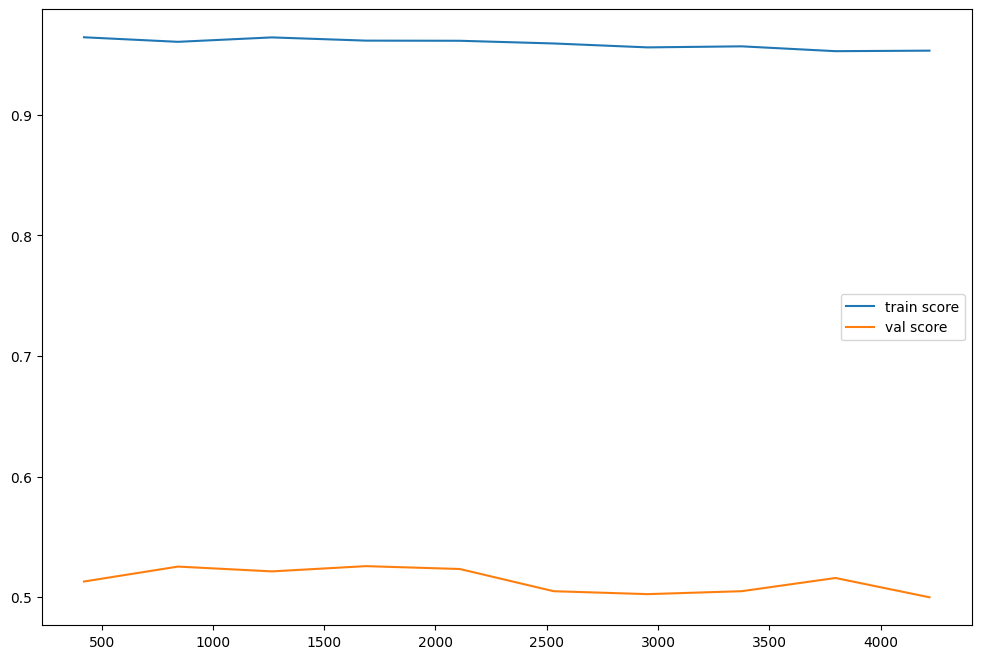

In [131]:
evaluation(model)

### feature extraction

In [132]:
##pd.DataFrame(model.feature_importances_,index=X_train.columns).plot.bar(figsize=(12,8))

In [133]:
pd.DataFrame(model.feature_importances_,index=X_train.columns)

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

In [ ]:
from sklearn.ensemble import RandomForestClassifier


c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [  0 225 375 376 403 405 406 408 411 414 417 420 423 456 457 459 462 465
 468 471 474 481 483 486 489 492 495 498 505 507 508 510 511 513 514 516
 517 519 520 522 528 529 531 534 537 540 543 550 551 553 554 556 557 559
 560 562 563 565 572 575 578 581 584 591 592 594 597 600 603 610 611 613
 614 616 617 619 620 622 629 632 635 638 645 646 648 651 654 661 662 664
 665 667 668 670 677 680 683 690 691 693 696 703 704 706 707 709 716 719
 726 727 729 736 737 739 746 753 754 760 771 772 773 775 776 778] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\benmo\AppData\Local\Programs\Python\Python3

[[769 269]
 [ 98 270]]
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1038
           1       0.50      0.73      0.60       368

    accuracy                           0.74      1406
   macro avg       0.69      0.74      0.70      1406
weighted avg       0.79      0.74      0.75      1406



c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [  0 225 375 376 403 405 406 408 411 414 417 420 423 456 457 459 462 465
 468 471 474 481 483 486 489 492 495 498 505 507 508 510 511 513 514 516
 517 519 520 522 528 529 531 534 537 540 543 550 551 553 554 556 557 559
 560 562 563 565 572 575 578 581 584 591 592 594 597 600 603 610 611 613
 614 616 617 619 620 622 629 632 635 638 645 646 648 651 654 661 662 664
 665 667 668 670 677 680 683 690 691 693 696 703 704 706 707 709 716 719
 726 727 729 736 737 739 746 753 754 760 771 772 773 775 776 778] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\benmo\AppData\Local\Programs\Python\Python3

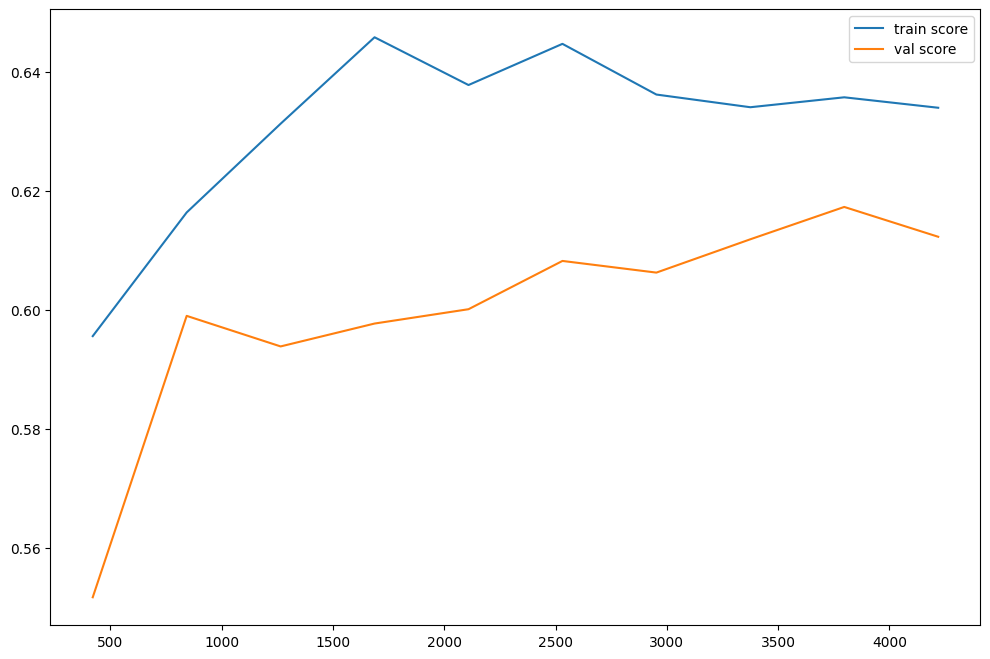

In [ ]:
model=make_pipeline(PolynomialFeatures(2),SelectKBest(f_classif,k=8),DecisionTreeClassifier(
    max_depth=5,              
    min_samples_leaf=50,      
    class_weight='balanced',  
    random_state=42
))
evaluation(model)


In [ ]:
pd.DataFrame(model.feature_importances_,index=X_train.columns).plot.bar(figsize=(12,9))

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

### Choice the best model

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
preprocesor=make_pipeline(SelectKBest(f_classif,k=8))


In [ ]:
rf_model = make_pipeline(preprocesor, RandomForestClassifier(random_state=0))
adaboost_model = make_pipeline(preprocesor, AdaBoostClassifier(random_state=0)) 
svm_model = make_pipeline(preprocesor, StandardScaler(), SVC(random_state=0))
knn_model = make_pipeline(preprocesor, StandardScaler(), KNeighborsClassifier())
descisiontree_model=make_pipeline(preprocesor,DecisionTreeClassifier())
model_list={"RandomForest":rf_model,"AdaBoostClassifier":adaboost_model,"SVM":svm_model,"KNN":knn_model,"DecisionTreeClassifier":descisiontree_model}

RandomForest
[[861 177]
 [183 185]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1038
           1       0.51      0.50      0.51       368

    accuracy                           0.74      1406
   macro avg       0.67      0.67      0.67      1406
weighted avg       0.74      0.74      0.74      1406

AdaBoostClassifier
[[924 114]
 [191 177]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1038
           1       0.61      0.48      0.54       368

    accuracy                           0.78      1406
   macro avg       0.72      0.69      0.70      1406
weighted avg       0.77      0.78      0.77      1406

SVM
[[928 110]
 [184 184]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1038
           1       0.63      0.50      0.56       368

    accuracy                           0.79      1406
   macro avg       0.73

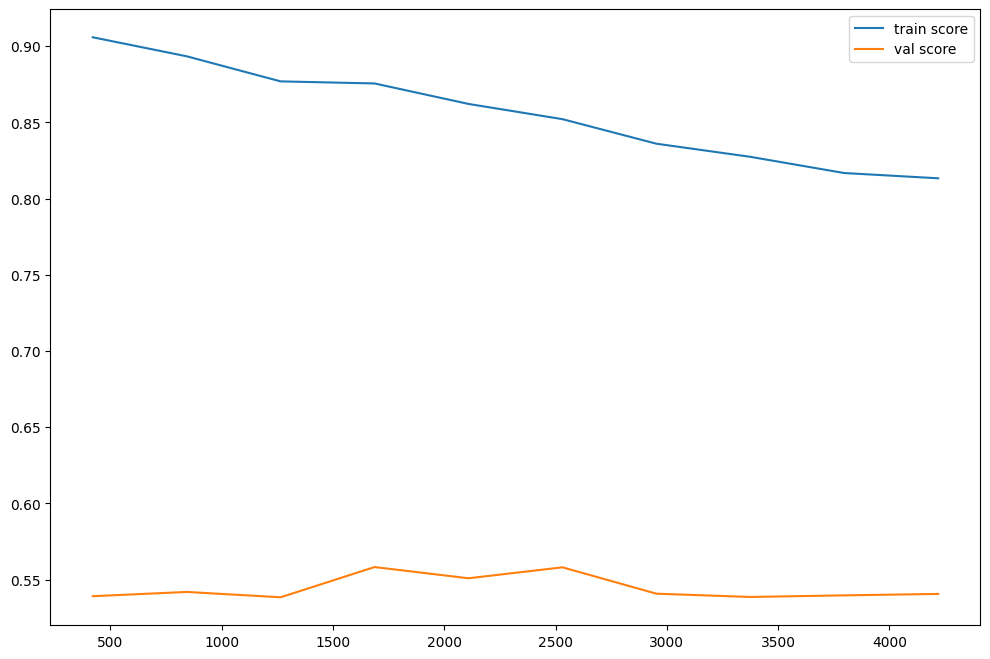

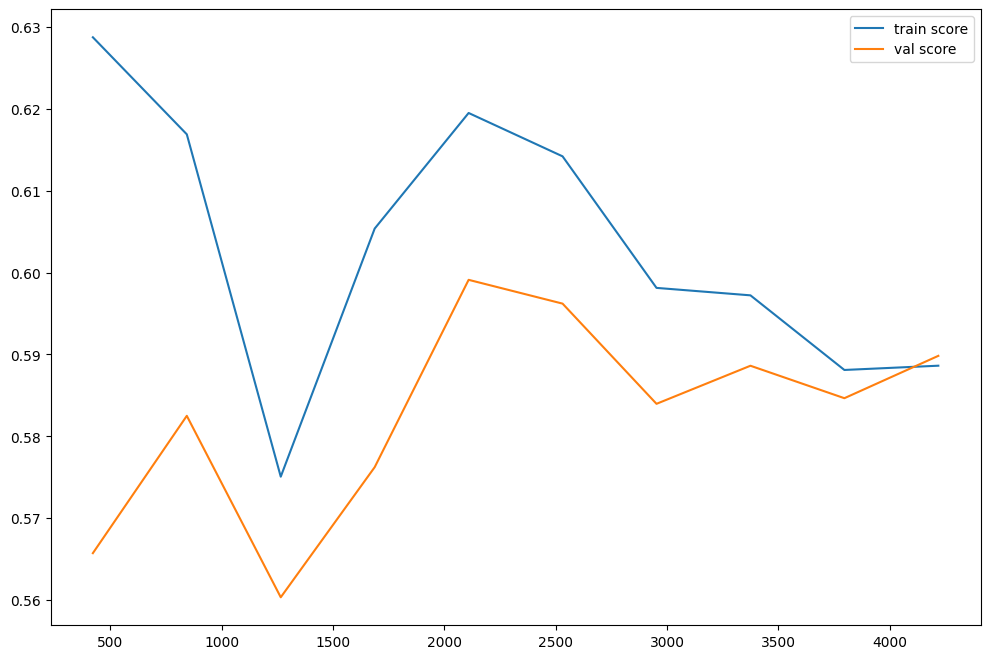

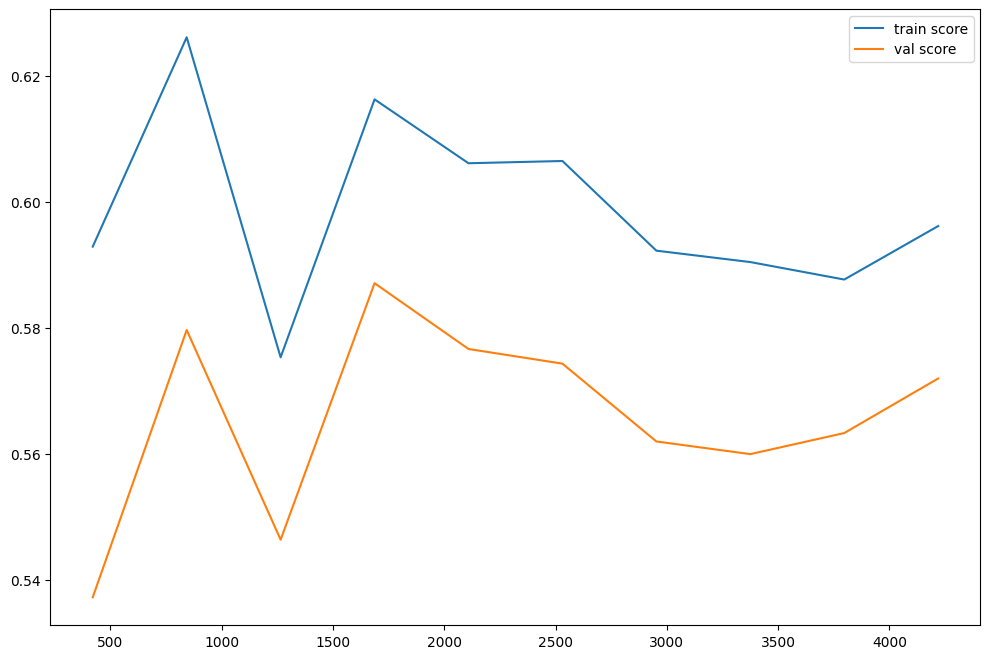

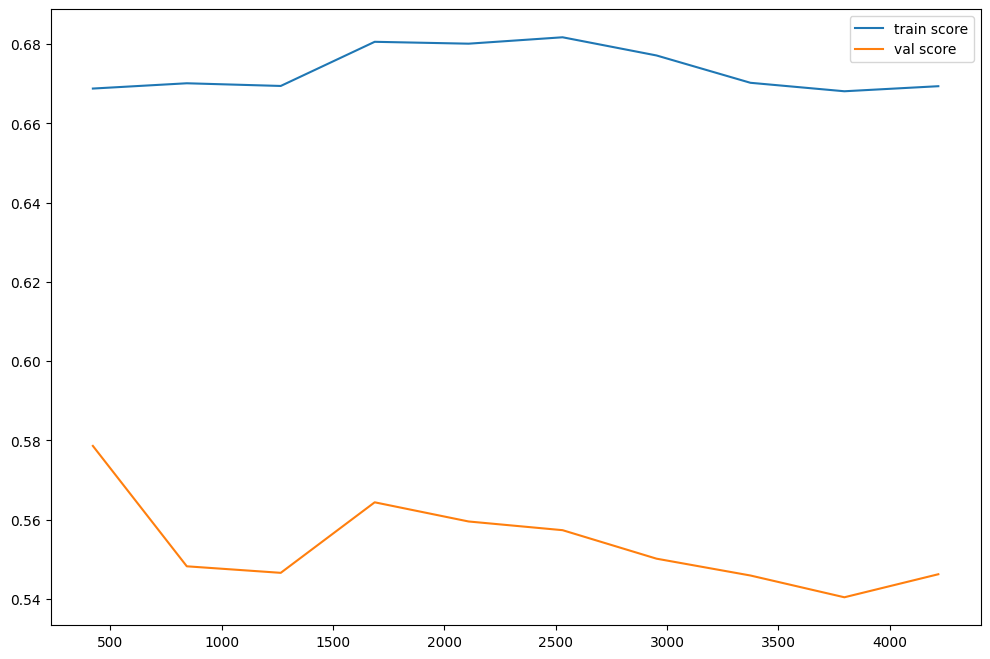

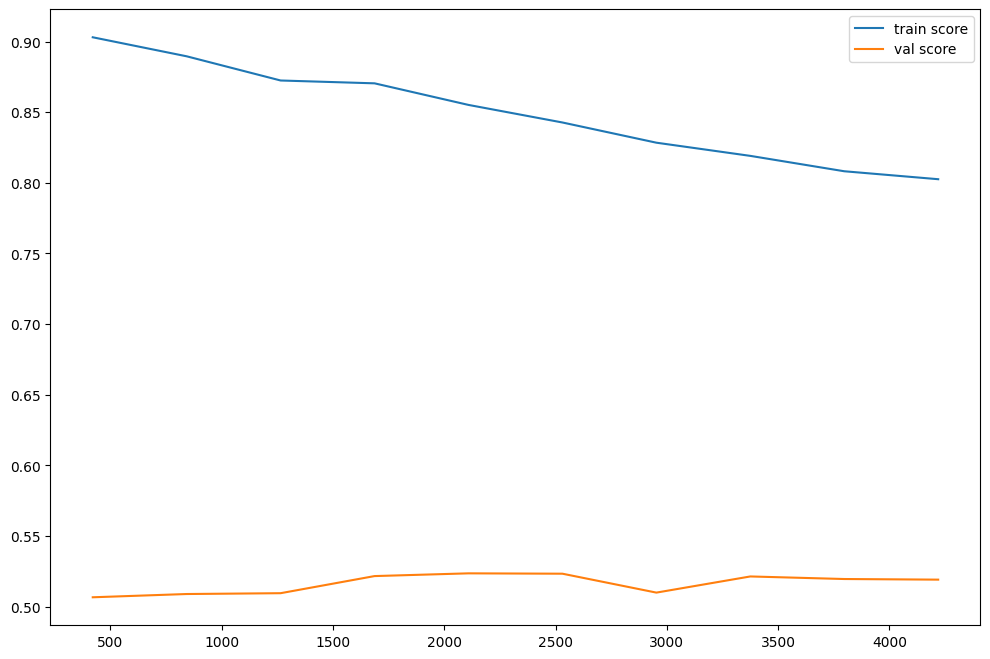

In [ ]:
for name,model in model_list.items():
    print(name)
    evaluation(model)

### Modification

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
svm_model


,steps,"[('pipeline', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('selectkbest', ...)]"
,transform_input,None
,memory,None
,verbose,False
,score_func,<function f_c...001749029C900>
,k,8
,copy,True


In [ ]:
hyper_params2 = {
  
    'pipeline__selectkbest__k': range(10, 50, 5),  

    'adaboostclassifier__n_estimators': [50, 100, 200],
    'adaboostclassifier__learning_rate': [0.01, 0.1, 1.0],
    
    'adaboostclassifier__estimator': [
        DecisionTreeClassifier(max_depth=1), 
        DecisionTreeClassifier(max_depth=2)
    ]
}
hyper_params={
    'pipeline__selectkbest__k': range(10, 50,5),  
    'svc__C':[1,10,100,1000],
    'svc__gamma':[1e-3,1e-4]
}

In [ ]:
grid=RandomizedSearchCV(svm_model,hyper_params,scoring='f1',cv=4,n_iter=40)
grid.fit(X_train,y_train)
print(grid.best_params_)
y_pred=grid.predict(X_test)
print(classification_report(y_test,y_pred))


c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=38. All the features will be returned.
  warnings.warn(
c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=38. All the features will be returned.
  warnings.warn(
c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=38. All the features will be returned.
  warnings.warn(
c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=38. All the features will be returned.
  warnings.warn(
c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn

{'svc__gamma': 0.001, 'svc__C': 10, 'pipeline__selectkbest__k': 45}
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1038
           1       0.66      0.49      0.57       368

    accuracy                           0.80      1406
   macro avg       0.75      0.70      0.72      1406
weighted avg       0.79      0.80      0.79      1406



c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=45 is greater than n_features=38. All the features will be returned.
  warnings.warn(


[[946  92]
 [186 182]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1038
           1       0.66      0.49      0.57       368

    accuracy                           0.80      1406
   macro avg       0.75      0.70      0.72      1406
weighted avg       0.79      0.80      0.79      1406



c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=45 is greater than n_features=38. All the features will be returned.
  warnings.warn(
c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=45 is greater than n_features=38. All the features will be returned.
  warnings.warn(
c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=45 is greater than n_features=38. All the features will be returned.
  warnings.warn(
c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=45 is greater than n_features=38. All the features will be returned.
  warnings.warn(
c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn

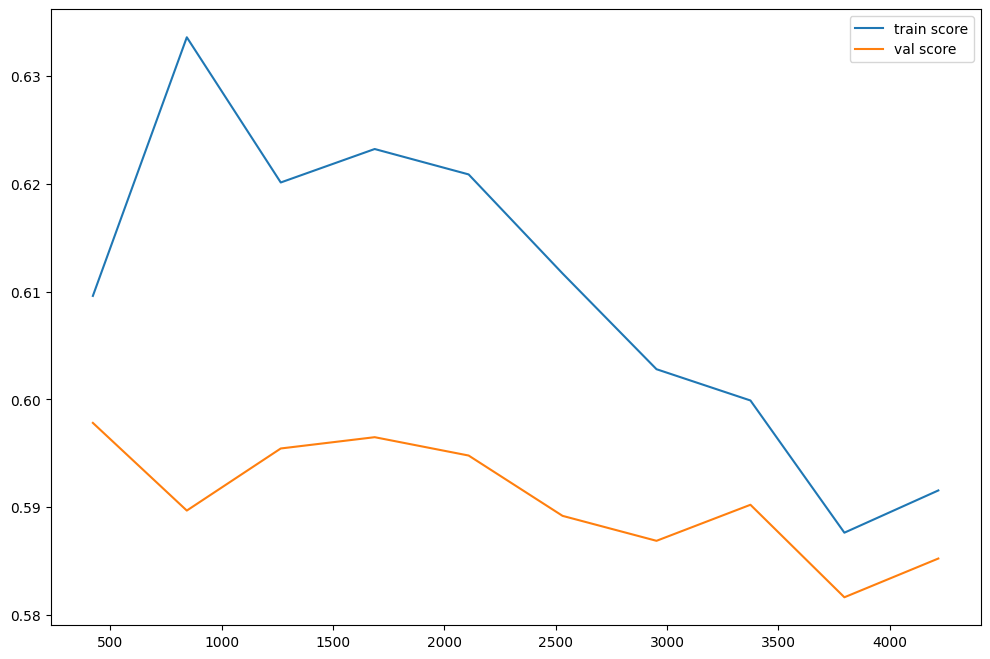

In [ ]:
evaluation(grid.best_estimator_)

In [ ]:
from sklearn.metrics import precision_recall_curve


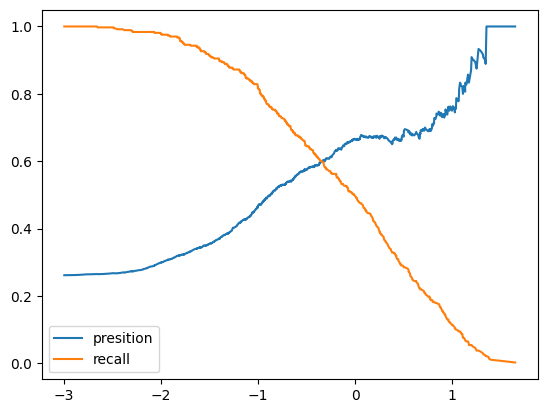

In [143]:
precision,  recall,threshold=precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))
plt.plot(threshold,precision[:-1],label='presition')
plt.plot(threshold,recall[:-1],label='recall')
plt.legend()

In [ ]:
def model_final(model,X,threshold=0):
    return model.decision_function(X) > threshold

In [ ]:
y_pred=model_final(grid.best_estimator_,X_test,threshold=-0.2)

In [ ]:
f1_score(y_test,y_pred)

0.5956834532374101

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.5625

In [ ]:
from sklearn.metrics import accuracy_score,precision_score
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8001422475106685
0.6330275229357798


### Final Model

In [135]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [136]:
class CustomEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        
        binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
        for col in binary_cols:
            if col in X_copy.columns:
                X_copy[col] = X_copy[col].replace({"Yes": 1, 'No': 0}).astype(int)

        if 'gender' in X_copy.columns:
            X_copy['gender'] = X_copy['gender'].replace({'Male': 1, 'Female': 0}).astype(int)

        contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
        if 'Contract' in X_copy.columns:
            X_copy['Contract'] = X_copy['Contract'].map(contract_mapping).astype(int)
            
        return X_copy

In [137]:
class DropNaImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.dropna(axis=0)

In [138]:
nominal_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'PaymentMethod'
]

one_hot_preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', 
         OneHotEncoder(handle_unknown='ignore', sparse_output=False), 
         nominal_cols)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [139]:
preprocessing_pipline=Pipeline(steps=[
    ('custom_encoder', CustomEncoder()),
    ('one_hot_encode', one_hot_preprocessor),
    ('imputer', DropNaImputer()),
])

In [140]:
hyper_params={
    'pipeline__selectkbest__k': range(7, 100),

    'svc__C':[1,10,100,1000],
    'svc__gamma':[1e-3,1e-4]
}

Fitting 4 folds for each of 40 candidates, totalling 160 fits


c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=81 is greater than n_features=38. All the features will be returned.
  warnings.warn(


{'svc__gamma': 0.001, 'svc__C': 10, 'pipeline__selectkbest__k': 81}
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1038
           1       0.66      0.49      0.57       368

    accuracy                           0.80      1406
   macro avg       0.75      0.70      0.72      1406
weighted avg       0.79      0.80      0.79      1406



c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=81 is greater than n_features=38. All the features will be returned.
  warnings.warn(


[[946  92]
 [186 182]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1038
           1       0.66      0.49      0.57       368

    accuracy                           0.80      1406
   macro avg       0.75      0.70      0.72      1406
weighted avg       0.79      0.80      0.79      1406



c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=81 is greater than n_features=38. All the features will be returned.
  warnings.warn(
c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=81 is greater than n_features=38. All the features will be returned.
  warnings.warn(
c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=81 is greater than n_features=38. All the features will be returned.
  warnings.warn(
c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=81 is greater than n_features=38. All the features will be returned.
  warnings.warn(
c:\Users\benmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn

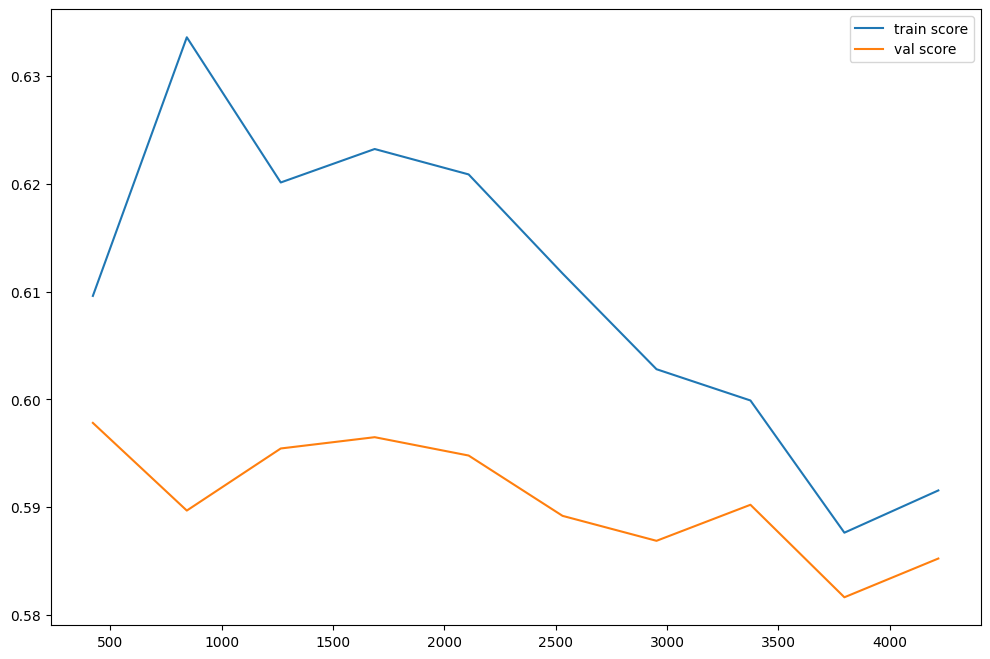

In [141]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
grid=RandomizedSearchCV(svm_model,hyper_params,scoring="f1",cv=4,n_iter=40,n_jobs=-1, verbose=2)
grid.fit(X_train,y_train)
print(grid.best_params_)
y_pred=grid.predict(X_test)
print(classification_report(y_test,y_pred))
evaluation(grid.best_estimator_)

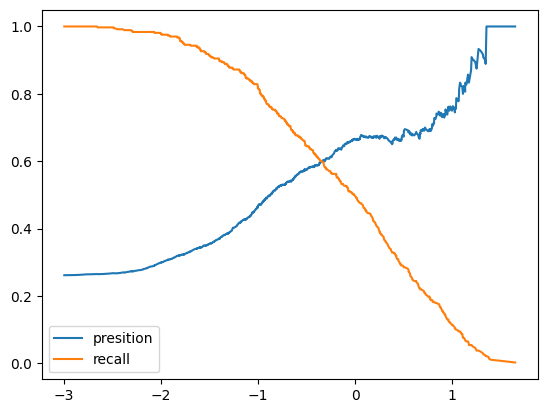

In [142]:
from sklearn.metrics import precision_recall_curve

precision,  recall,threshold=precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))
plt.plot(threshold,precision[:-1],label='presition')
plt.plot(threshold,recall[:-1],label='recall')
plt.legend()

In [ ]:
def model_final(model,X,threshold=-0.4):
    return model.decision_function(X) > threshold

In [ ]:
grid.best_params_


<module 'preprocessing' from 'c:\\Users\\benmo\\Desktop\\Ahmed Khalil\\Horizon School of Digital Technologies\\L3\\Machine Learning\\Project\\preprocessing.py'>

In [150]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC

from preprocessing import CustomEncoder,ThresholdClassifier


df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()

X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn'].replace({"Yes": 1, 'No': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


nominal_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'PaymentMethod'
]

one_hot_preprocessor = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_cols)],
    remainder='passthrough',
    verbose_feature_names_out=False
)

FULL_MODEL_PIPELINE = Pipeline(steps=[
    ('preprocessor', Pipeline(steps=[
        ('custom_encoder', CustomEncoder()), 
        ('one_hot_encode', one_hot_preprocessor)
    ])),
    ('selector', SelectKBest(f_classif, k=89)), 
    ('scaler', StandardScaler()),
    ('svc_wrapper', ThresholdClassifier(
        estimator=SVC(C=10, gamma=0.001, probability=True, random_state=42),
        threshold=-0.8  
    ))
])


FULL_MODEL_PIPELINE.fit(X_train, y_train)

joblib.dump(FULL_MODEL_PIPELINE, 'final_churn_prediction_pipeline.pkl')
print("Model saved successfully! You can now move this .pkl file to your server.")

C:\Users\benmo\AppData\Local\Temp\ipykernel_22472\4020534536.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df['Churn'].replace({"Yes": 1, 'No': 0})
c:\Users\benmo\Desktop\Ahmed Khalil\Horizon School of Digital Technologies\L3\Machine Learning\Project\preprocessing.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  if col in X_copy.columns:
c:\Users\benmo\Desktop\Ahmed Khalil\Horizon School of Digital Technologies\L3\Machine Learning\Project\preprocessing.py:14: FutureWarning: Downcasting behavior in `replace` is depre

Model saved successfully! You can now move this .pkl file to your server.
